In [1]:
# 第一个cell - 添加项目路径和加载配置
import sys
import os
sys.path.append('..')

# 导入库
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import yaml

# 加载配置
def load_config(config_path='../config/config.yaml'):
    with open(config_path, 'r', encoding='utf-8') as f:
        return yaml.safe_load(f)

config = load_config()
print("配置加载成功！")

配置加载成功！


In [ ]:
# 第二个cell - 加载训练好的模型
from src.models.cnn import DigitCNN
from src.models.mlp import DigitMLP

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 根据配置选择模型
if config['model']['type'] == 'cnn':
    model = DigitCNN()
else:
    model = DigitMLP()

model_path = '../models/best_model.pth'
if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path)['model_state_dict'])
    print("模型加载成功！")
else:
    print(f"模型文件不存在: {model_path}")
    print("请先运行 python train.py 训练模型")

model.to(device)
model.eval()

模型加载成功！


DigitCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_feat

In [3]:
# 第三个cell - 在测试集上评估
from src.data.loader import load_mnist_data

_, test_loader = load_mnist_data(batch_size=config['data']['batch_size'])

all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [4]:
# 第四个cell - 计算准确率
accuracy = sum(p == l for p, l in zip(all_predictions, all_labels)) / len(all_labels)
print(f"测试集准确率: {accuracy:.4f}")

测试集准确率: 0.9954


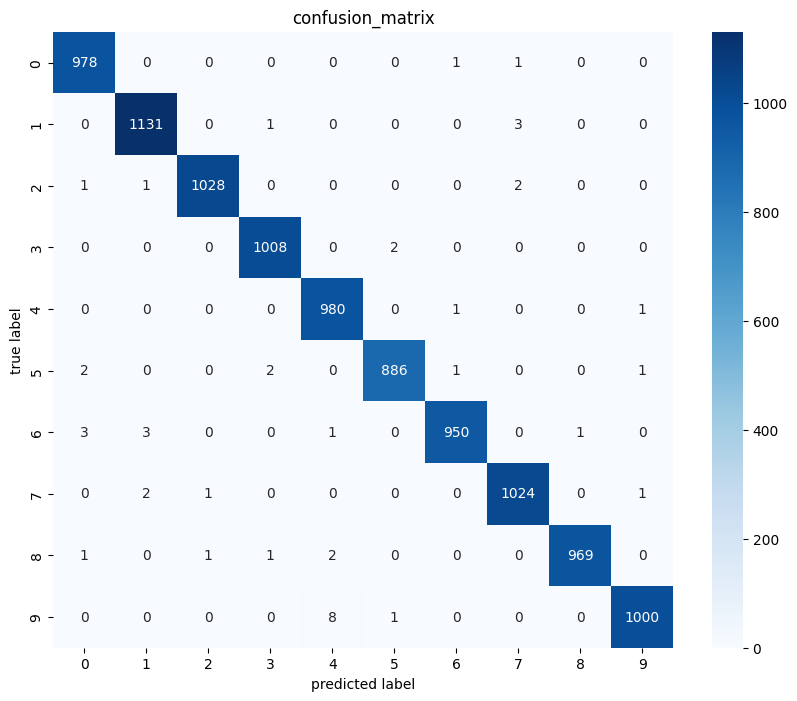

In [5]:
# 第五个cell - 混淆矩阵

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('confusion_matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [6]:
# 第六个cell - 分类报告
print("分类报告:")
print(classification_report(all_labels, all_predictions, target_names=[str(i) for i in range(10)]))

分类报告:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      1.00      1028
           8       1.00      0.99      1.00       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

